In [1]:
import torch.nn as nn
import torch.optim as optim
import torch
from NeuralNetworkModels import mlp_voltage_predictor

In [2]:
class autoencoder(nn.Module):
    def __init__(self, input_size):
        super().__init__() # inherit everything from parent class (nn.modlue)
        hidden_dim = 64
        self.encoder =  nn.LSTM(input_size=input_size, hidden_size=hidden_dim, num_layers=2, batch_first=True )
        self.decoder = nn.LSTM(input_size=hidden_dim, hidden_size=input_size, num_layers=2, batch_first=True )
    def encode(self, current_trace): 
        _, (h_n, _) = self.encoder(current_trace) 
        return h_n[-1]
    def forward(self, x):
        representation = self.encode(x)
        output,_ = self.decoder(representation)
        return representation, output


In [3]:
# Preparing training data
import numpy as np
import os
import pandas as pd

cell_id = 323865917
input_size = 30
sample_size = 1000
output_size = 5
from autoencoder_raw_data import sample_batch_training_data
input_tensor, output_tensor = sample_batch_training_data(cell_id, input_size, sample_size, output_size)
print(range)

(37, 1)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 2.58844901e-16  6.47112253e-17  2.58844901e-16  6.74075264e-19
  6.74075264e-19  1.07852042e-17  6.74075264e-19 -5.39260211e-18
  1.07852042e-17 -2.02222579e-18  2.02222579e-18 -4.04445158e-18
 -2.69630106e-18 -2.02222579e-18  6.74075264e-19 -2.69630106e-18
 -2.69630106e-18 -2.69630106e-18 -2.69630106e-18 -2.69630106e-18
 -2.69630106e-18  2.58844901e-16  1.29422451e-16  1.07852042e-16
  4.31408169e-17  6.47112253e-17 -4.31408169e-17  4.31408169e-17
 -6.47112253e-17 -4.31408169e-17 -1.07852042e-16 -1.29422451e-16
 -2.58844901e-16 -1.07852042e-16 -1.50992859e-16 -1.07852042e-16
  0.00000000e+00]
<class 'range'>


In [4]:
# autoencoding
model = autoencoder(input_size = input_size)
criterion = nn.MSELoss() # mean squared error between each input and target
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# store trainging data 
X_train = torch.transpose(input_tensor, 0, 1)
Y_train = output_tensor # tensor is a way to store the data

num_epochs = 1000
losses = np.empty((num_epochs,))
# runs 200 training

for i in range(num_epochs):
    input_tensor, output_tensor = sample_batch_training_data(cell_id, input_size, sample_size, output_size)
    X_train = torch.transpose(input_tensor, 0, 1)
    print(X_train.dim)
    Y_train = torch.transpose(output_tensor, 0, 1)
    y_prediction = model(X_train) #predicts voltage
    print(Y_train.size())
    print(y_prediction.size())
    loss = criterion(y_prediction, Y_train) # calculates mean squared error
    optimizer.zero_grad() # reset gradient
    loss.backward() # differentiates error with respect to parameters > tells us how we should change the weights
    optimizer.step() # impliments changing the weights
    losses[i] = loss.item()

print(losses)
print(range)


(37, 1)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 2.58844901e-16  6.47112253e-17  2.58844901e-16  6.74075264e-19
  6.74075264e-19  1.07852042e-17  6.74075264e-19 -5.39260211e-18
  1.07852042e-17 -2.02222579e-18  2.02222579e-18 -4.04445158e-18
 -2.69630106e-18 -2.02222579e-18  6.74075264e-19 -2.69630106e-18
 -2.69630106e-18 -2.69630106e-18 -2.69630106e-18 -2.69630106e-18
 -2.69630106e-18  2.58844901e-16  1.29422451e-16  1.07852042e-16
  4.31408169e-17  6.47112253e-17 -4.31408169e-17  4.31408169e-17
 -6.47112253e-17 -4.31408169e-17 -1.07852042e-16 -1.29422451e-16
 -2.58844901e-16 -1.07852042e-16 -1.50992859e-16 -1.07852042e-16
  0.00000000e+00]
<built-in method dim of Tensor object at 0x000001580A1F42F0>


ValueError: LSTM: Expected input to be 2D or 3D, got 1D instead

In [ ]:
# creates a model with 20 inputs
from NeuralNetworkModels import mlp_voltage_predictor
model = mlp_voltage_predictor(input_size = input_size, output_size=output_size)
print(model)


criterion = nn.MSELoss() # mean squared error between each input and target
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# store trainging data 
X_train = torch.transpose(input_tensor, 0, 1)
Y_train = output_tensor # tensor is a way to store the data

num_epochs = 1000
losses = np.empty((num_epochs,))
# runs 200 training

for i in range(num_epochs):
    input_tensor, output_tensor = sample_batch_training_data(cell_id, input_size, sample_size, output_size)
    X_train = torch.transpose(input_tensor, 0, 1)
    Y_train = torch.transpose(output_tensor, 0, 1)
    y_prediction = model(X_train) #predicts voltage
    print(Y_train.size())
    print(y_prediction.size())
    loss = criterion(y_prediction, Y_train) # calculates mean squared error
    optimizer.zero_grad() # reset gradient
    loss.backward() # differentiates error with respect to parameters > tells us how we should change the weights
    optimizer.step() # impliments changing the weights
    losses[i] = loss.item()

print(losses)
print(range)

TypeError: Linear.__init__() got an unexpected keyword argument 'num_layers'

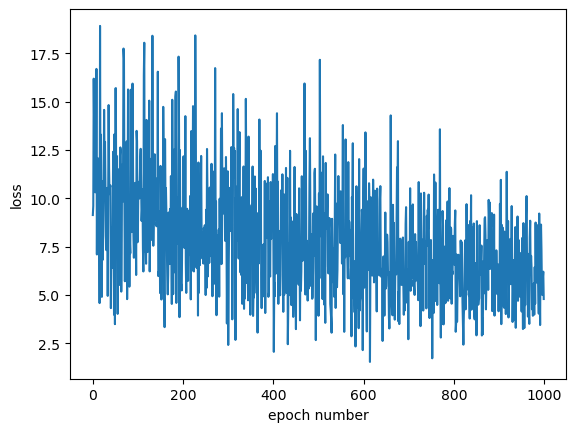

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch number")
ax.set_ylabel("loss")
plt.show()

In [ ]:
from NeuralNetworkModels import LSTM_voltage_predictor
model = LSTM_voltage_predictor(input_size = input_size, output_size=output_size)
print(model)


criterion = nn.MSELoss() # mean squared error between each input and target
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# store trainging data 
X_train = torch.transpose(input_tensor, 0, 1)
Y_train = output_tensor # tensor is a way to store the data

num_epochs = 1000
losses = np.empty((num_epochs,))
# runs 200 training

for i in range(num_epochs):
    input_tensor, output_tensor = sample_batch_training_data(cell_id, input_size, sample_size, output_size)
    X_train = torch.transpose(input_tensor, 0, 1)
    Y_train = torch.transpose(output_tensor, 0, 1)
    y_prediction = model(X_train) #predicts voltage
    print(Y_train.size())
    print(y_prediction.size())
    loss = criterion(y_prediction, Y_train) # calculates mean squared error
    optimizer.zero_grad() # reset gradient
    loss.backward() # differentiates error with respect to parameters > tells us how we should change the weights
    optimizer.step() # impliments changing the weights
    losses[i] = loss.item()

print(losses)
print(range)

ImportError: cannot import name 'LSTM_voltage_predictor' from 'NeuralNetworkModels' (c:\Users\lynnh\OneDrive\research\cell_classification\scripts\NeuralNetworkModels.py)

In [ ]:
print(range)

<class 'range'>


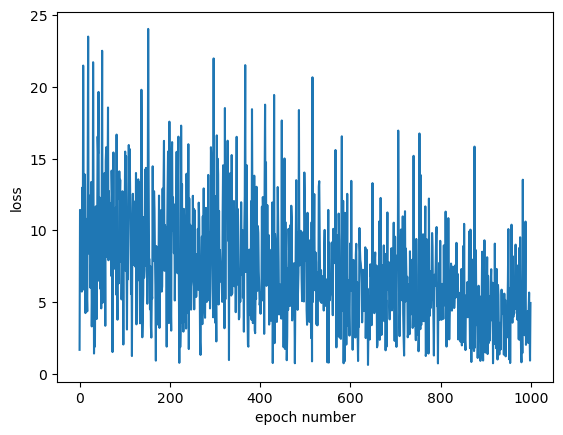

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch number")
ax.set_ylabel("loss")
plt.show()

In [ ]:
voltage_data = np.load(f"{os.pardir}/data/{cell_id}_voltage.npy")
range_volt = np.ptp(voltage_data, axis=1)
print(np.min(voltage_data, axis = 1))
print(np.max(voltage_data, axis = 1))
print(range)
print(np.shape(voltage_data))
print(np.shape(np.mean(voltage_data, axis = 1)))

meet_voltage =np.expand_dims(np.mean(voltage_data, axis=1), axis=1)
print(np.shape(meet_voltage))
std = np.std(voltage_data, axis = 1)
std = np.expand_dims(std, axis =1)
voltage_data -= meet_voltage
voltage_data/=std
print(np.std(voltage_data, axis = 1))
print(np.mean(voltage_data, axis = 1))

[-1.01938574e-02 -1.01938574e-02 -1.01938574e-02 -9.31206322e+00
 -1.86241264e+01 -2.79369373e+01 -3.72482529e+01 -4.65618896e+01
 -5.58738747e+01 -5.12183685e+01 -5.49380836e+01 -5.77337379e+01
 -6.05286560e+01 -6.51824188e+01 -7.44965057e+01 -6.98402939e+01
 -6.98402939e+01 -6.98402939e+01 -6.98402939e+01 -6.98402939e+01
 -6.98402939e+01 -1.16408745e+02 -9.52422791e+01 -7.40773010e+01
 -5.29113922e+01 -3.17473621e+01 -1.05822992e+01 -8.09796453e-01
 -2.42922020e+00 -4.04896927e+00 -5.66763830e+00 -7.28762960e+00
 -8.90798378e+00 -1.05268669e+01 -1.21463556e+01 -1.37652168e+01
 -1.53855724e+01]
[1.18748199e+02 1.12886147e+02 1.17279732e+02 1.04661057e+02
 2.09322113e+02 3.13984741e+02 4.18644226e+02 5.23302063e+02
 6.27969482e+02 5.75639099e+02 6.17491028e+02 6.48896912e+02
 6.80289734e+02 7.32633057e+02 8.37288452e+02 7.84953552e+02
 7.84953552e+02 7.84953552e+02 7.84953552e+02 7.84953552e+02
 7.84953552e+02 8.90798378e+00 7.28762960e+00 5.66763830e+00
 4.04896927e+00 2.42922020e+00 

Frequencies: 5 Hz, 25 Hz, 80 Hz
Amplitudes: 1.06, 1.93, 1.60

Bandpass filter: 15-35 Hz (isolating 25 Hz component)


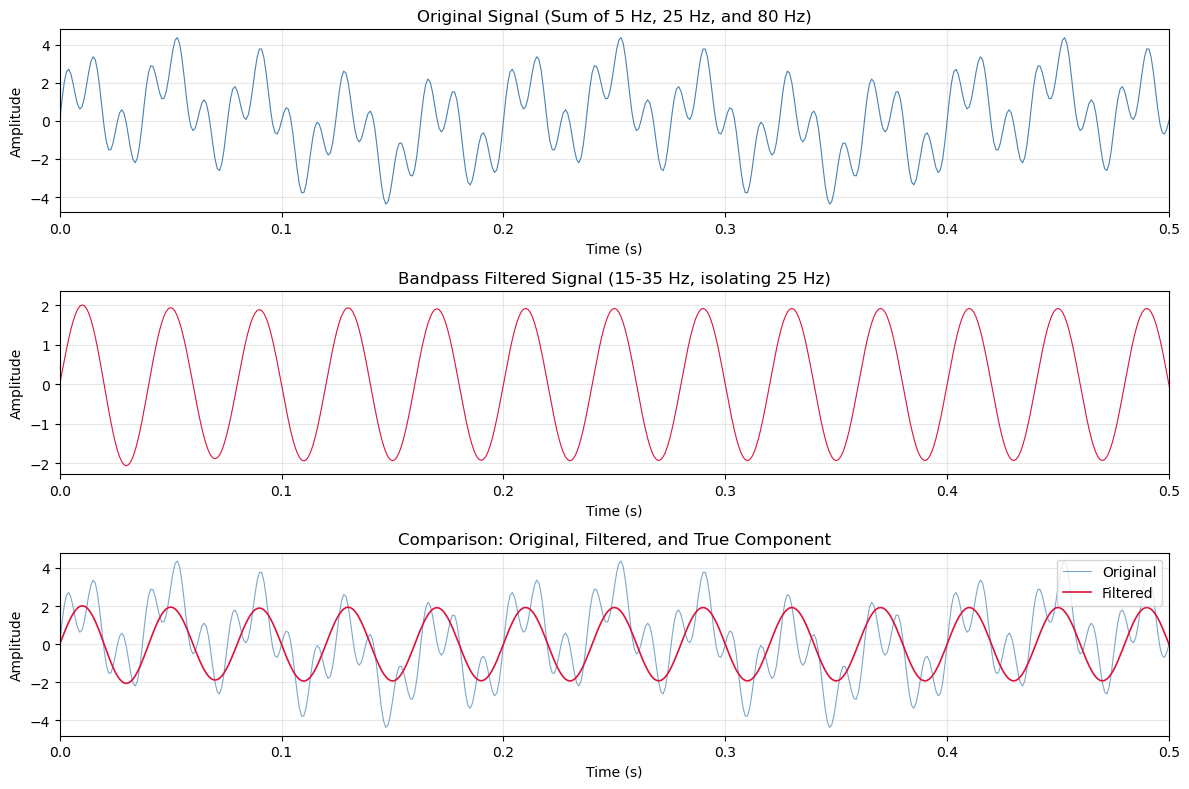

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Set random seed for reproducibility
np.random.seed(42)

# Signal parameters
fs = 1000 # Sampling frequency (Hz)
duration = 2 # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Three frequencies (Hz)
f1, f2, f3 = 5, 25, 80

# Random amplitudes between 0.5 and 2
amp1 = np.random.uniform(0.5, 2)
amp2 = np.random.uniform(0.5, 2)
amp3 = np.random.uniform(0.5, 2)

print(f"Frequencies: {f1} Hz, {f2} Hz, {f3} Hz")
print(f"Amplitudes: {amp1:.2f}, {amp2:.2f}, {amp3:.2f}")

# Create the composite signal
signal1 = amp1 * np.sin(2 * np.pi * f1 * t)
signal2 = amp2 * np.sin(2 * np.pi * f2 * t)
signal3 = amp3 * np.sin(2 * np.pi * f3 * t)

composite_signal = signal1 + signal2 + signal3

# Bandpass filter design to isolate the middle frequency (25 Hz)
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered = filtfilt(b, a, data)
    return filtered

# Filter to isolate f2 (25 Hz) - using a bandwidth of ±10 Hz
lowcut = 15
highcut = 35
filtered_signal = bandpass_filter(composite_signal, lowcut, highcut, fs)

print(f"\nBandpass filter: {lowcut}-{highcut} Hz (isolating {f2} Hz component)")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# Plot 1: Original composite signal
axes[0].plot(t, composite_signal, color='steelblue', linewidth=0.8)
axes[0].set_title(f'Original Signal (Sum of {f1} Hz, {f2} Hz, and {f3} Hz)', fontsize=12)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_xlim([0, 0.5]) # Show first 0.5 seconds for clarity
axes[0].grid(True, alpha=0.3)

# Plot 2: Bandpass filtered signal
axes[1].plot(t, filtered_signal, color='crimson', linewidth=0.8)
axes[1].set_title(f'Bandpass Filtered Signal ({lowcut}-{highcut} Hz, isolating {f2} Hz)', fontsize=12)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlim([0, 0.5])
axes[1].grid(True, alpha=0.3)

# Plot 3: Overlay comparison
axes[2].plot(t, composite_signal, color='steelblue', linewidth=0.8, alpha=0.7, label='Original')
axes[2].plot(t, filtered_signal, color='crimson', linewidth=1.2, label='Filtered')
# axes[2].plot(t, signal2, color='green', linewidth=1, linestyle='--', alpha=0.8,
# label=f'True {f2} Hz component')
axes[2].set_title('Comparison: Original, Filtered, and True Component', fontsize=12)
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim([0, 0.5])
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
